In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.duplicated().sum()

31994

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df_cleaned = df.copy()

In [7]:
filter1 = (df_cleaned["children"] == 0) & (df_cleaned["adults"] == 0) & (df_cleaned["babies"] == 0)
people_df = df_cleaned.loc[~filter1]
people_df.duplicated().sum()

0

In [8]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87226 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                            8723

In [9]:
df_cleaned.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
df_cleaned_da = df_cleaned[["lead_time", "total_of_special_requests", "adr"]]
df_cleaned_da.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,87396.0,79.891368,86.052325,0.00,11.0,49.0,125.0,737.0
total_of_special_requests,87396.0,0.698567,0.831946,0.00,0.0,0.0,1.0,5.0
adr,87396.0,106.337246,55.013953,-6.38,72.0,98.1,134.0,5400.0


In [11]:
df_cleaned.describe(include=["float64", "int64"]).T

,count,mean,std,min,25%,50%,75%,max
is_canceled,87396.0,0.274898,0.446466,0.00,0.0,0.0,1.0,1.0
lead_time,87396.0,79.891368,86.052325,0.00,11.0,49.0,125.0,737.0
arrival_date_year,87396.0,2016.210296,0.686102,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,87396.0,26.838334,13.674572,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87396.0,15.815541,8.835146,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87396.0,1.005263,1.031921,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,87396.0,2.625395,2.053584,0.00,1.0,2.0,4.0,50.0
adults,87396.0,1.875795,0.626500,0.00,2.0,2.0,2.0,55.0
children,87392.0,0.138640,0.455881,0.00,0.0,0.0,0.0,10.0
babies,87396.0,0.010824,0.113597,0.00,0.0,0.0,0.0,10.0


In [12]:
df_cleaned_da[["lead_time", "adr"]].describe(percentiles=[i / 100 for i in range(90,101)])

,lead_time,adr
count,87396.000000,87396.000000
mean,79.891368,106.337246
std,86.052325,55.013953
min,0.000000,-6.380000
50%,49.000000,98.100000
90%,204.000000,174.000000
91%,212.000000,179.000000
92%,220.000000,185.000000
93%,230.000000,190.000000
94%,241.000000,197.000000


In [13]:
df_cleaned["is_canceled"].unique()

array([0, 1], dtype=int64)

In [14]:
df_cleaned.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [15]:
not_canceled_by_country = df_cleaned[df_cleaned["is_canceled"] == 0]["country"].value_counts().reset_index()

In [16]:
not_canceled_by_country.columns = ["country", "num_of_guests"]
not_canceled_by_country

,country,num_of_guests
0,PRT,17662
1,GBR,8448
2,FRA,7104
3,ESP,5390
4,DEU,4334
...,...,...
160,ZMB,1
161,SYC,1
162,MDG,1
163,SMR,1


In [19]:
import chart_studio.plotly as py

import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected = True)

In [20]:
map_quest = px.choropleth(data_frame = not_canceled_by_country, 
              locations = not_canceled_by_country["country"],
              color = not_canceled_by_country["num_of_guests"],
              hover_name = not_canceled_by_country["country"],
              title = "Home Country of Guests",
              )

In [45]:
map_quest.show()

In [22]:
pivot = pd.crosstab(index = df_cleaned["reserved_room_type"], columns = df_cleaned["assigned_room_type"], margins = 1)
pivot

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,P,All
reserved_room_type,,,,,,,,,,,,,
A,45879,894,1256,6410,1035,390,178,94,209,207,0,0,56552
B,106,874,0,5,2,2,8,0,0,2,0,0,999
C,5,2,867,6,4,2,10,9,10,0,0,0,915
D,296,27,33,15984,657,199,82,9,67,44,0,0,17398
E,15,3,6,22,5462,383,98,4,40,16,0,0,6049
F,6,17,0,4,31,2636,113,3,10,3,0,0,2823
G,5,2,2,0,4,14,1999,7,15,4,0,0,2052
H,0,0,0,1,0,0,10,579,6,0,0,0,596
L,1,1,1,0,0,1,0,1,0,0,1,0,6


In [23]:
pivot_relative = pd.crosstab(index = df_cleaned["reserved_room_type"], columns = df_cleaned["assigned_room_type"], normalize="index").round(2)
pivot_relative

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,P
reserved_room_type,,,,,,,,,,,,
A,0.81,0.02,0.02,0.11,0.02,0.01,0.00,0.00,0.00,0.0,0.00,0.0
B,0.11,0.87,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.0,0.00,0.0
C,0.01,0.00,0.95,0.01,0.00,0.00,0.01,0.01,0.01,0.0,0.00,0.0
D,0.02,0.00,0.00,0.92,0.04,0.01,0.00,0.00,0.00,0.0,0.00,0.0
E,0.00,0.00,0.00,0.00,0.90,0.06,0.02,0.00,0.01,0.0,0.00,0.0
F,0.00,0.01,0.00,0.00,0.01,0.93,0.04,0.00,0.00,0.0,0.00,0.0
G,0.00,0.00,0.00,0.00,0.00,0.01,0.97,0.00,0.01,0.0,0.00,0.0
H,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.97,0.01,0.0,0.00,0.0
L,0.17,0.17,0.17,0.00,0.00,0.17,0.00,0.17,0.00,0.0,0.17,0.0


In [24]:
df_cleaned.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [25]:
df_cleaned.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [26]:
df_cleaned["market_segment"].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

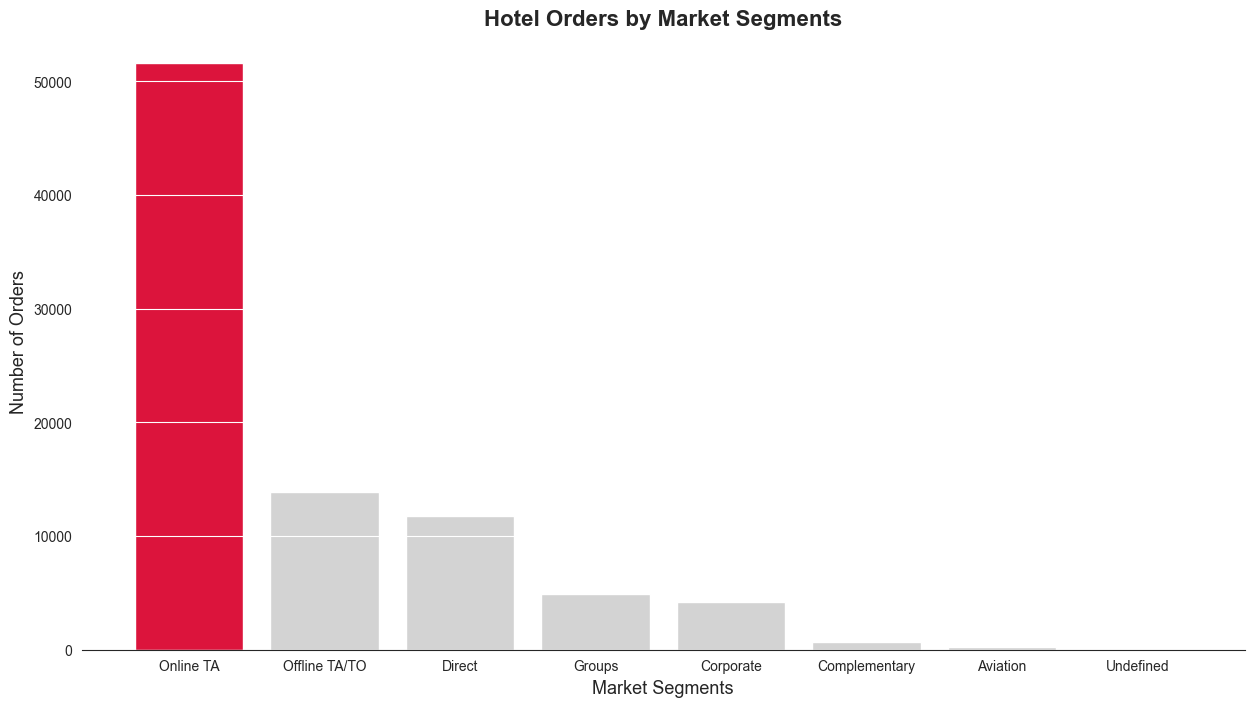

In [27]:
plt.figure(figsize = (15,8))
sns.set_style("white")

market_segment_counts = height=df_cleaned["market_segment"].value_counts()
colors = ["crimson"] + ["lightgrey"] * (len(market_segment_counts) - 1)

plt.bar(market_segment_counts.index,
        market_segment_counts.values,
        color = colors,
        zorder = 0
        )

plt.grid(visible = 1,
         zorder = 1,
         color = "white",
         axis="y"
         )

plt.title("Hotel Orders by Market Segments", fontsize = 16, fontweight = "bold")
plt.xlabel("Market Segments", fontsize = 13)
plt.ylabel("Number of Orders", fontsize = 13)

sns.despine(left = True)

plt.show()

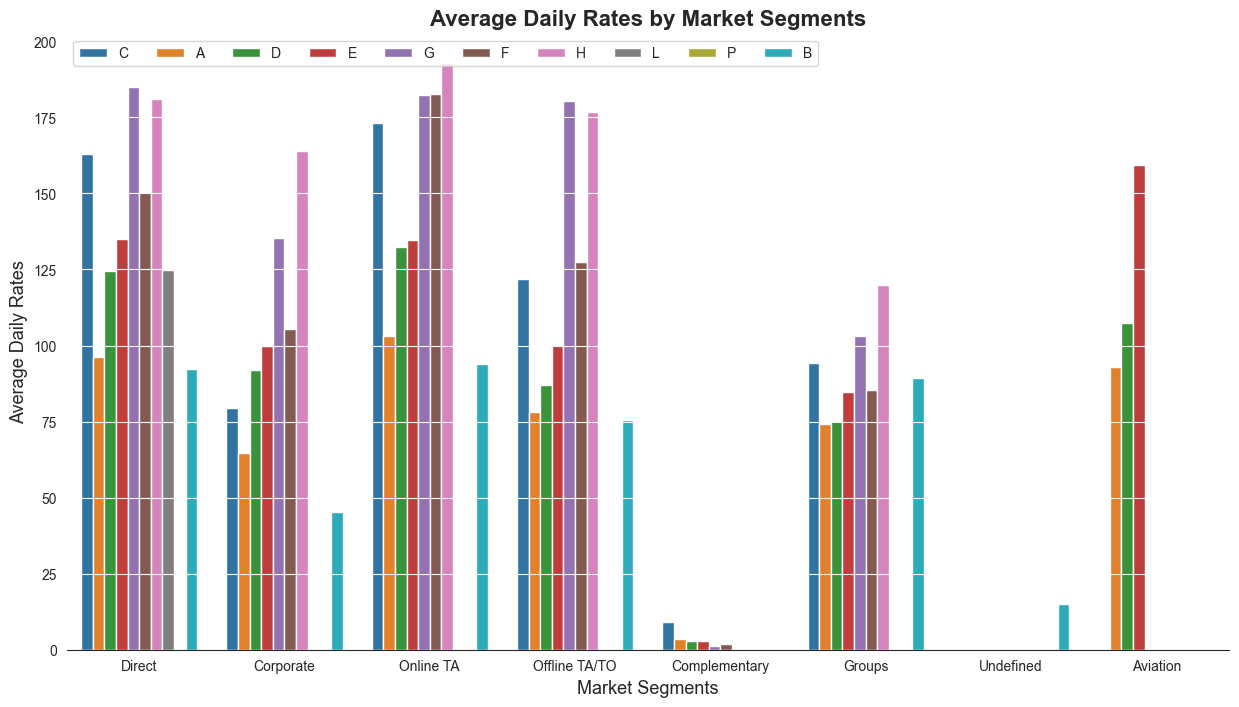

In [28]:
from warnings import filterwarnings

filterwarnings("ignore")

plt.figure(figsize = (15, 8))
sns.barplot(x = "market_segment", 
            y = "adr", 
            hue = "reserved_room_type", 
            data = df_cleaned,
            ci=None, 
            zorder = 0
            )

plt.grid(visible = 1,
         zorder = 1,
         color = "white",
         axis="y"
         )

plt.title("Average Daily Rates by Market Segments", fontsize = 16, fontweight = "bold")
plt.xlabel("Market Segments", fontsize = 13)
plt.ylabel("Average Daily Rates", fontsize = 13)
plt.legend(loc = "upper left",
           ncols = df_cleaned["reserved_room_type"].nunique()
           )

sns.despine(left = True)

plt.show()

In [29]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

In [62]:
df_cleaned["arrival_date"] = df_cleaned["arrival_date_year"].astype("str") + "-" + df_cleaned["arrival_date_month"].astype("str") + "-" + df_cleaned["arrival_date_day_of_month"].astype("str")
df_cleaned["arrival_date_dt"] = pd.to_datetime(df_cleaned["arrival_date"])
df_cleaned["arrival_date_dt"], df_cleaned["arrival_date"]

(0        2015-07-01
 1        2015-07-01
 2        2015-07-01
 3        2015-07-01
 4        2015-07-01
             ...    
 119385   2017-08-30
 119386   2017-08-31
 119387   2017-08-31
 119388   2017-08-31
 119389   2017-08-29
 Name: arrival_date_dt, Length: 87396, dtype: datetime64[ns],
 0            2015-July-1
 1            2015-July-1
 2            2015-July-1
 3            2015-July-1
 4            2015-July-1
                ...      
 119385    2017-August-30
 119386    2017-August-31
 119387    2017-August-31
 119388    2017-August-31
 119389    2017-August-29
 Name: arrival_date, Length: 87396, dtype: object)

In [48]:
data_dates = df_cleaned["arrival_date_dt"].value_counts()
data_dates

arrival_date_dt
2017-04-29    237
2017-07-15    220
2016-06-26    210
2017-05-25    210
2016-10-29    209
             ... 
2015-12-15     28
2015-11-15     27
2015-12-07     26
2015-12-13     19
2015-11-29     18
Name: count, Length: 793, dtype: int64

In [66]:
data_dates_weekly = data_dates.resample(rule = "W").sum()
data_dates_weekly.sort_index()

arrival_date_dt
2015-07-05     270
2015-07-12     345
2015-07-19     370
2015-07-26     405
2015-08-02     419
              ... 
2017-08-06    1044
2017-08-13     986
2017-08-20    1131
2017-08-27     928
2017-09-03     461
Freq: W-SUN, Name: count, Length: 114, dtype: int64

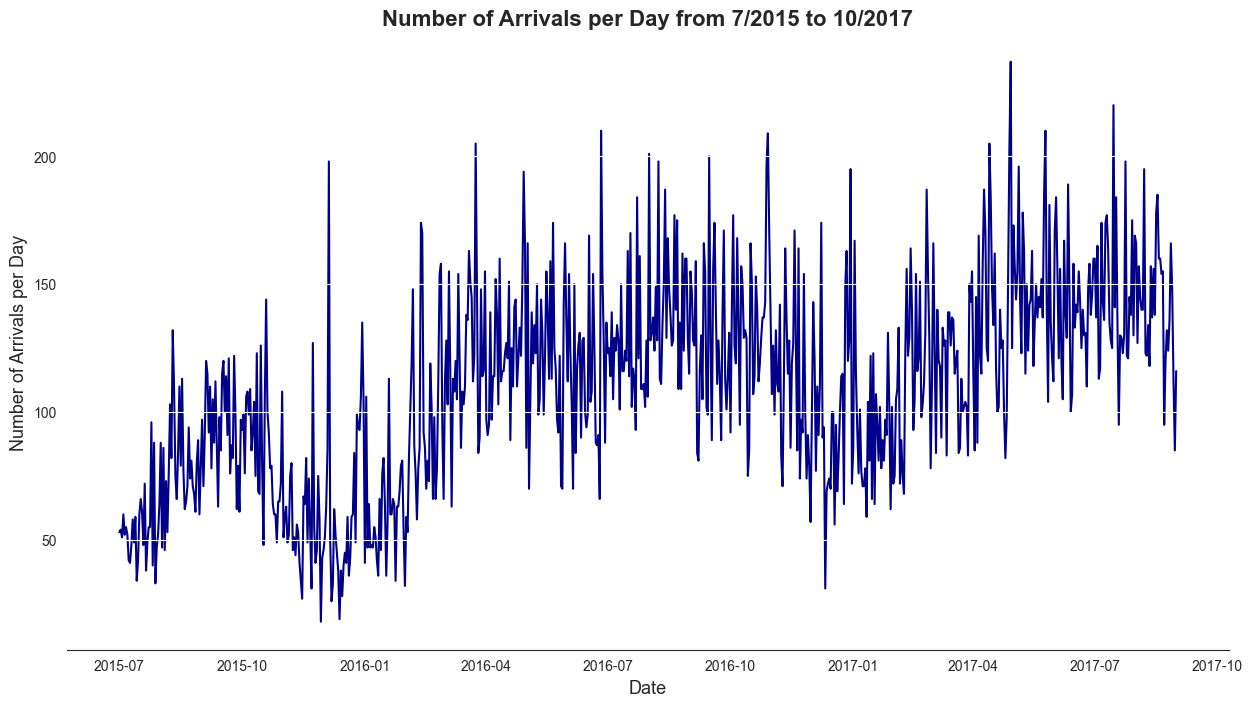

In [67]:
plt.figure(figsize = (15, 8))
sns.lineplot(data = data_dates,
             color = "darkblue",
            zorder = 0
            )

plt.grid(visible = 1,
         zorder = 1,
         color = "white",
         axis="y"
         )

plt.title("Number of Arrivals per Day from 7/2015 to 10/2017", fontsize = 16, fontweight = "bold")
plt.xlabel("Date", fontsize = 13)
plt.ylabel("Number of Arrivals per Day", fontsize = 13)

sns.despine(left = True)

plt.show()

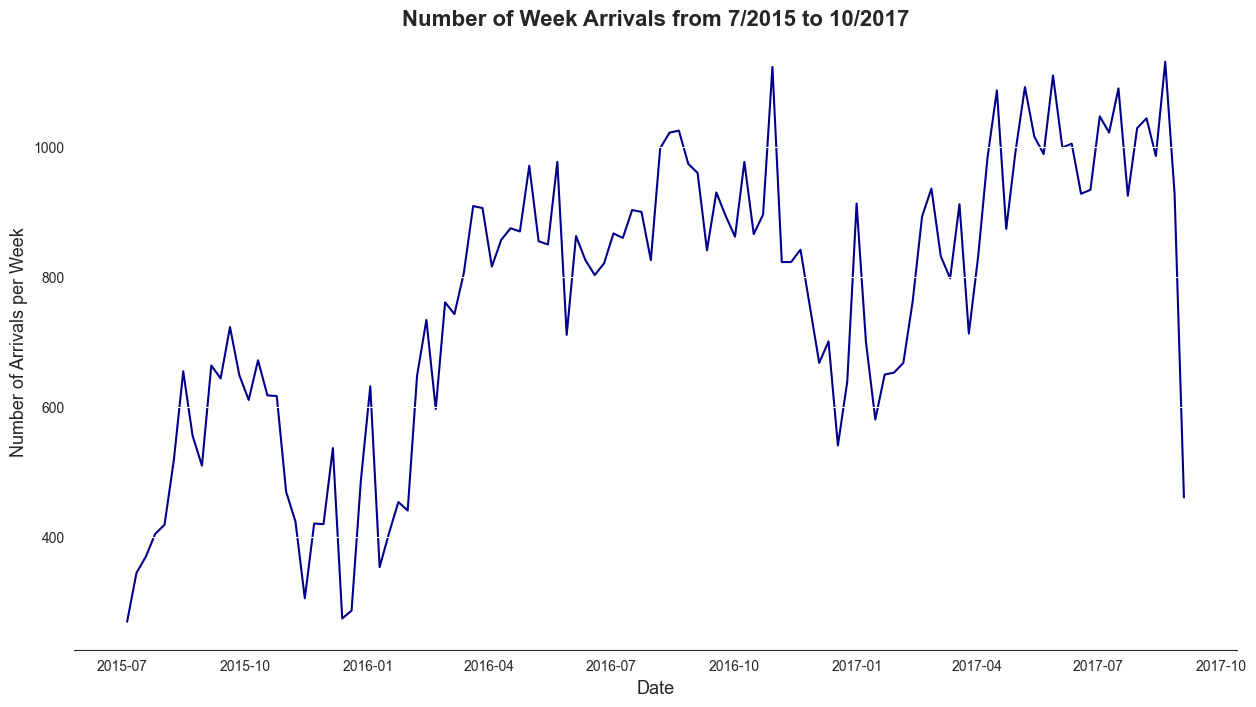

In [68]:
plt.figure(figsize = (15, 8))
sns.lineplot(data = data_dates_weekly,
             color = "darkblue",
            zorder = 0
            )

plt.grid(visible = 1,
         zorder = 1,
         color = "white",
         axis="y"
         )

plt.title("Number of Week Arrivals from 7/2015 to 10/2017", fontsize = 16, fontweight = "bold")
plt.xlabel("Date", fontsize = 13)
plt.ylabel("Number of Arrivals per Week", fontsize = 13)

sns.despine(left = True)

plt.show()